In [1]:
!pip install qiskit pylatexenc qiskit-aer

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.quantum_info import Operator
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from IPython.display import display
import random

[[ 0.7+0.j  0.7+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0.7+0.j -0.7+0.j]
 [ 0. +0.j  0. +0.j  0.7+0.j  0.7+0.j]
 [ 0.7+0.j -0.7+0.j  0. +0.j  0. +0.j]]


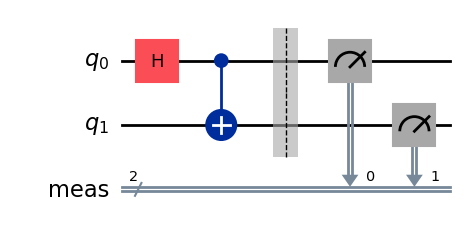

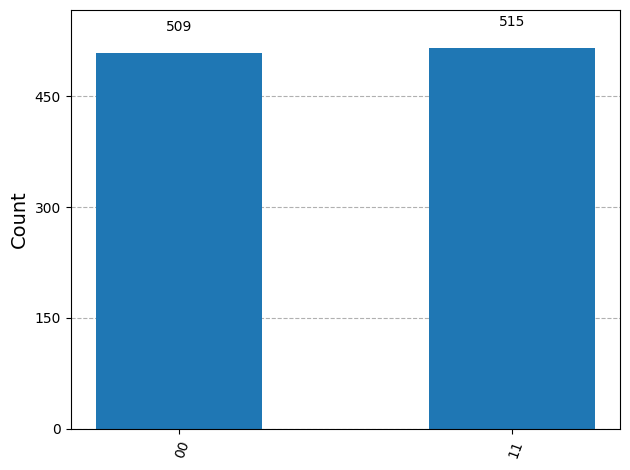

In [3]:
qc = QuantumCircuit(2)

qc.h([0])
qc.cx([0],[1])

unitary_operator = Operator(qc)
final_matrix = unitary_operator.data
np.set_printoptions(precision=1, suppress=True, linewidth=np.inf)
print(final_matrix)

qc.measure_all()

display(qc.draw(output="mpl"))

sampler = StatevectorSampler()
result = sampler.run([qc], shots=1024).result()
counts = result[0].data.meas.get_counts()
print()
display(plot_histogram(counts))

[[ 0.7+0.j  0.7+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0.7+0.j -0.7+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.7+0.j  0.7+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.7+0.j -0.7+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.7+0.j  0.7+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.7+0.j -0.7+0.j]
 [ 0. +0.j  0. +0.j  0.7+0.j  0.7+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0.7+0.j -0.7+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]]


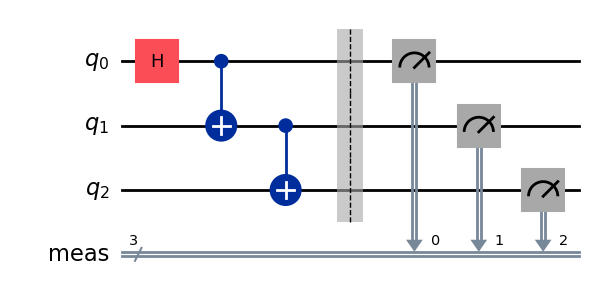

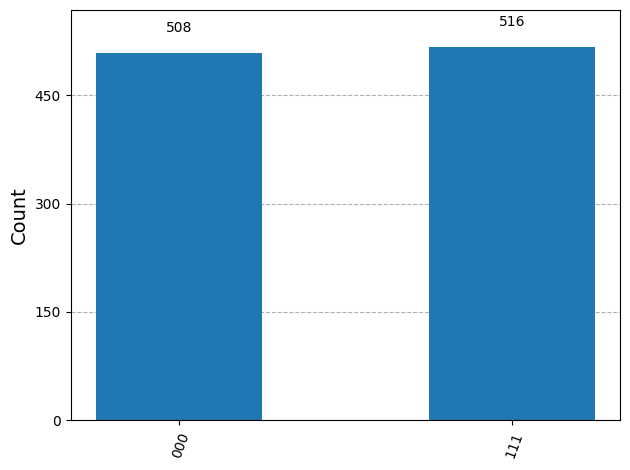

In [4]:
qc = QuantumCircuit(3)

qc.h([0])
qc.cx([0,1],[1,2])

unitary_operator = Operator(qc)
final_matrix = unitary_operator.data
np.set_printoptions(precision=1, suppress=True, linewidth=np.inf)
print(final_matrix)

qc.measure_all()

display(qc.draw(output="mpl"))

sampler = StatevectorSampler()
result = sampler.run([qc], shots=1024).result()
counts = result[0].data.meas.get_counts()
print()
display(plot_histogram(counts))

## QFT

In [5]:
def QFT(qc):
  qc.barrier()
  for i in range(qc.num_qubits - 1, -1,-1):
    qc.h(i)
    for j in range(i-1, -1, -1):
      qc.cp(np.pi/2**(i-j), j, i)
    qc.barrier()
  for i in range(qc.num_qubits//2):
    qc.swap(i, qc.num_qubits - i - 1)
  qc.barrier()

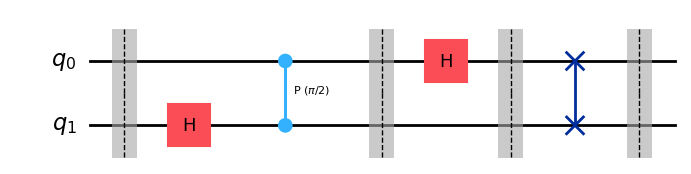

[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0.5+0.j   0. +0.5j -0.5+0.j  -0. -0.5j]
 [ 0.5+0.j  -0.5+0.j   0.5+0.j  -0.5+0.j ]
 [ 0.5+0.j  -0. -0.5j -0.5+0.j   0. +0.5j]]


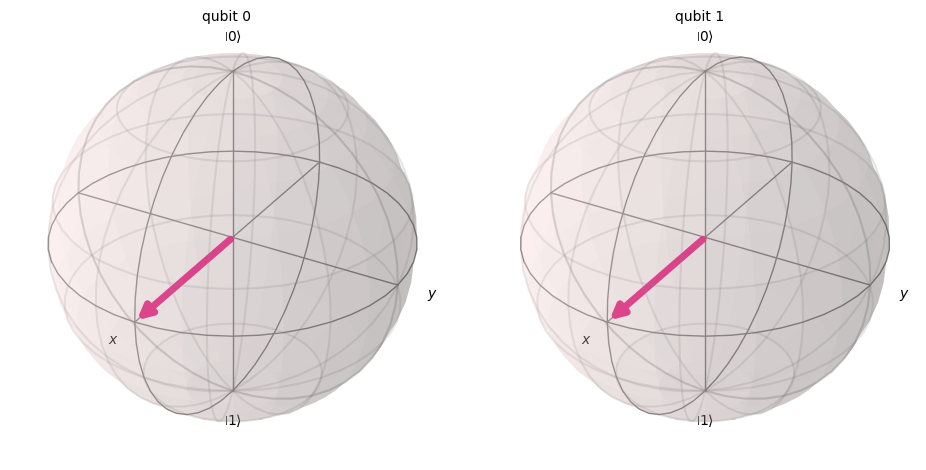

In [6]:
n = 2
qc = QuantumCircuit(n)

# qc.x([i for i in range(n) if random.random() < 0.5])
# qc.x([1])

QFT(qc)

display(qc.draw(output="mpl"))

unitary_operator = Operator(qc)
final_matrix = unitary_operator.data
np.set_printoptions(precision=1, suppress=True, linewidth=np.inf)
print(final_matrix)

qc.save_statevector()
simulator = AerSimulator()
job = simulator.run(qc)
result = job.result()
statevector = result.get_statevector(qc)
display(plot_bloch_multivector(statevector))

## Bloch

No Gate


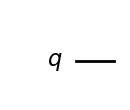

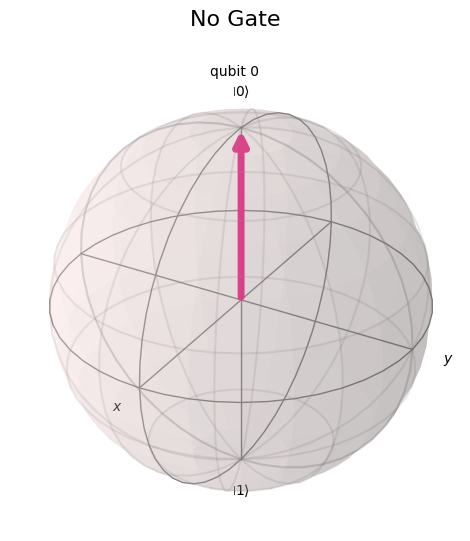

X Gate


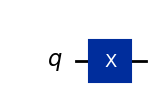

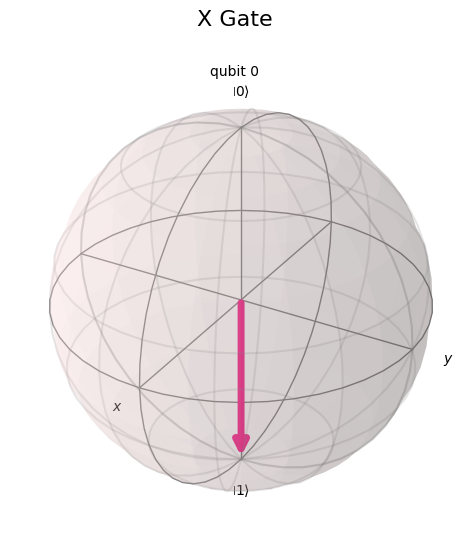

Y Gate


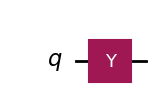

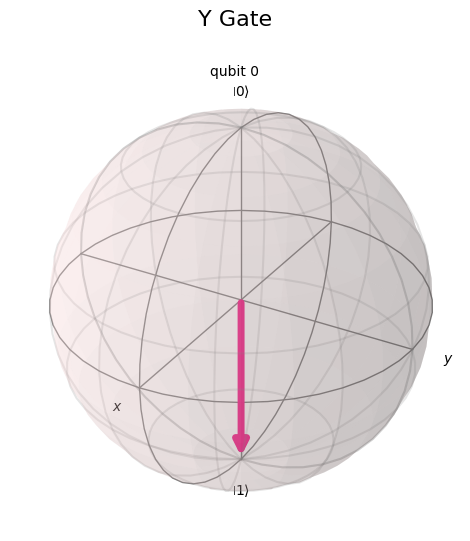

Z Gate


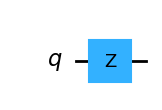

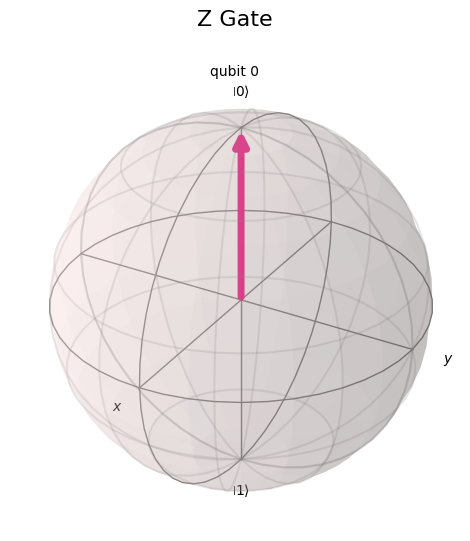

H Gate


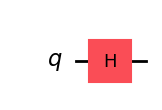

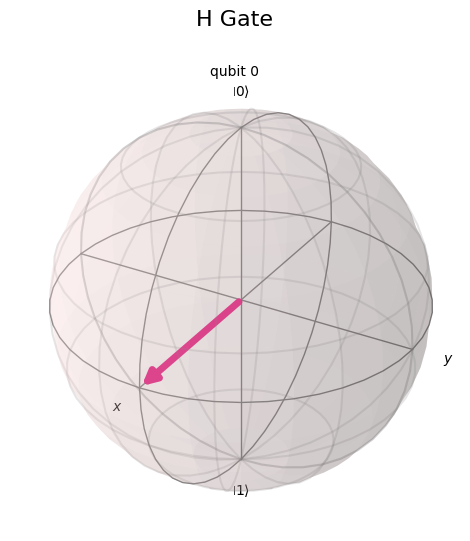

S Gate


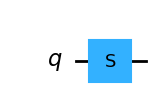

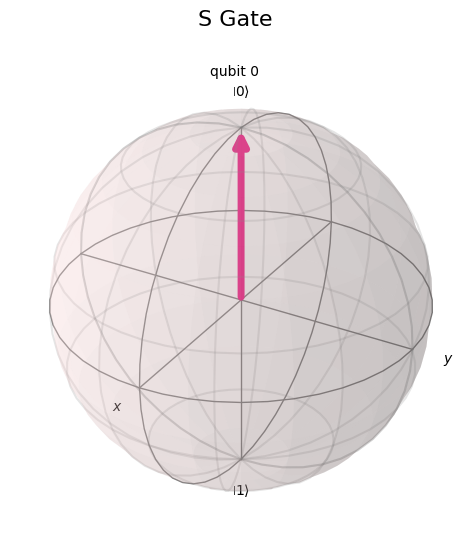

In [7]:
gate = [
    ['No Gate', lambda qc: None],
    ['X Gate', lambda qc: qc.x(0)],
    ['Y Gate', lambda qc: qc.y(0)],
    ['Z Gate', lambda qc: qc.z(0)],
    ['H Gate', lambda qc: qc.h(0)],
    ['S Gate', lambda qc: qc.s(0)],
]

for t, g in gate:
  print(t)
  qc = QuantumCircuit(1)
  g(qc)
  display(qc.draw(output="mpl"))

  qc.save_statevector()
  simulator = AerSimulator()
  job = simulator.run(qc)
  result = job.result()
  statevector = result.get_statevector(qc)
  display(plot_bloch_multivector(statevector, title=t))